In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2
from  tkinter import *
from tkinter import filedialog

Open the image

In [4]:
def showImageCV(im):
    cv2.imshow('image',im)
    k = cv2.waitKey(0)
    if k == 27:         # wait for ESC key to exit
        cv2.destroyAllWindows()
    elif k == ord('s'): # wait for 's' key to save and exit
        cv2.imwrite('messigray.png',im)
        cv2.destroyAllWindows()

In [5]:
def openFileDia():
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "D:/NeruralNetworks/",title = "choose your file",filetypes = (("image files","*.tif"),("all files","*.*")))
    #print (root.filename)
    root.withdraw()
    return root.filename
filePath = openFileDia()
DirPath = filePath[0:-1*len(filePath.split('/')[-1])]



In [14]:
filePath[0:-1*len(filePath.split('/')[-1])]
#len(filePath.split('/')[-1])

'D:/NeruralNetworks/Jupyter/Data/rawPL/'

In [3]:
numberOfIm = 100
imArray=np.zeros((512,640,numberOfIm),dtype=np.int16)
imVectorArray = np.zeros((512*640,numberOfIm),dtype=np.double)
for i in range(1, numberOfIm):
    filename = filename = DirPath+'image'+("%0.5o"% (i))+'.tiff.tif'
    #print(filename)
    imArray[:,:,i-1] = cv2.imread(filename,-1)
    imVectorArray[:,i-1]  = cv2.imread(filename,-1).reshape(512*640)
   


NameError: name 'DirPath' is not defined

In [ ]:
#showImageCV(imArray[:,:,i-1])
px_mean=imVectorArray.mean(axis=1)
px_sd=imVectorArray.std(axis=1)

In [ ]:
plt.plot(px_sd)
plt.ylabel('SD')
plt.show()

Find the pixels with too high and too low sd

In [ ]:
MenanSDs = px_sd.mean()
SDofSDs = px_sd.std()
sigma=1
WrongGroup1 = np.where(px_sd<=MenanSDs-sigma*SDofSDs)
WrongGroup2 = np.where(px_sd>=MenanSDs+sigma*SDofSDs)
BadPixMap=np.zeros(512*640,np.uint8)
BadPixMap[WrongGroup1]=255
BadPixMap[WrongGroup2]=255
BadPixMap = BadPixMap.reshape(512,640)

In [ ]:
showImageCV(BadPixMap)

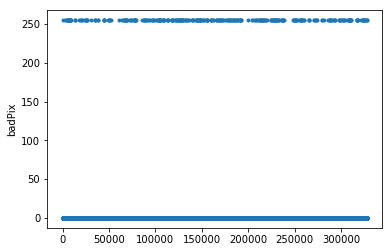

In [99]:
plt.plot(BadPixMap, '.')
plt.ylabel('badPix')
plt.show()

In [11]:
#showImageCV(tt[:,:,1])


In [12]:
tt[1,1,1]

14491

In [9]:
im[1,1]

14491